In [19]:
import numpy as np
import matplotlib.pylab as plt
import pickle

会将输入信号的总和转换为输出信号，这种函数一般称为激活函数（activation function）。

如“激活”一词所示，激活函数的作用在于决定如何来激活输入信号的总和。

感知机中使用了阶跃函数作为激活函数;

## 阶跃函数

In [4]:
# 阶跃函数
def step_function(x):
    return np.array(x>0, dtype='int')

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

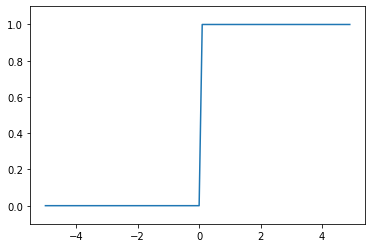

In [5]:
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # 指定y轴的范围
plt.show()

## sigmoid函数

如果果将激活函数从阶跃函数换成其他函数，就可以进入神经网络的世界了。

神经网络中经常使用的一个激活函数就是sigmoid函数（sigmoid function）。

cc：np.exp()函数是求 $e^x$ 的值的函数


$$sigmoid =  \frac{1}{1-e^x}$$


sigmoid函数的平滑性对神经网络的学习具有重要意义。

向sigmoid函数输入1.0或2.0后，就会有某个值被输出，类似h(1.0) = 0.731 ...、h(2.0) = 0.880 ...这样。

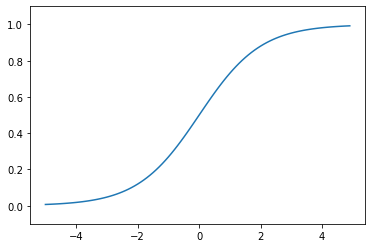

In [7]:
def sigmoid(x):
    return  1 / (1 + np.exp(-x)) 

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1) # 指定y轴的范围
plt.show()


### sigmoid函数和阶跃函数的比较

#### 区别
1. 首先注意到的是“平滑性”的不同。sigmoid函数是一条平滑的曲线，输出随着输入发生连续性的变化。而阶跃函数以0为界，输出发生急剧性的变化;
2. 相对于阶跃函数只能返回0或1，sigmoid函数可以返回0.731 ...、0.880 ...等实数（这一点和刚才的平滑性有关）。也就是说，感知机中神经元之间流动的是0或1的二元信号，而神经网络中流动的是连续的实数值信号;

#### 共性
1. 两者的结构均是“输入较小时，输出接近0（为0）；随着输入增大，输出向1靠近（变成1）”。也就是说，当输入信号为重要信息时，阶跃函数和sigmoid函数都会输出较大的值；当输入信号为不重要的信息时，两者都输出较小的值；
2. 不管输入信号有多小，或者有多大，输出信号的值都在0到1之间；
3. 两者均为非线性函数；


## ReLU函数

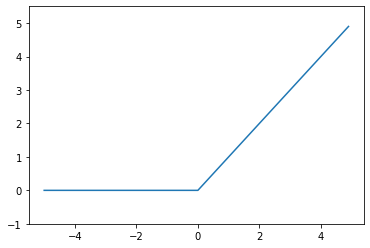

In [25]:
def relu(x):
    return np.maximum(0,x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

## 插播知识点：多维数组的运算

In [26]:
A = np.array([1, 2, 3, 4])
print(np.ndim(A))
print(A.shape)

1
(4,)


In [15]:
B = np.array([[1,2], [3,4], [5,6]])
print(np.ndim(B))
print(B.shape)

2
(3, 2)


In [17]:
A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])
np.dot(A, B)

# cc：np.dot()接收两个NumPy数组作为参数，并返回数组的乘积。
# 这里要注意的是，np.dot(A, B)和np.dot(B, A)的值可能不一样。
# 和一般的运算（+或*等）不同，矩阵的乘积运算中，操作数（A、 B）的顺序不同，结果也会不同。
# 在多维数组的乘积运算中，必须使两个矩阵中的对应维度的元素个数一致，这一点很重要！

array([[19, 22],
       [43, 50]])

## 3层神经网络的实现

In [23]:
# 对网的权重进行初始值定义。
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

# 定义恒等函数
def identity_function(x):
    return x

# 前向推进的过程；
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y

# 调用函数
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y) # [ 0.31682708 0.69627909]

[0.31682708 0.69627909]


In [ ]:
# 总结一下思路：

# 1. 每一层有两个步骤计算：
# （1）、先做线性计算；
# （2）、再做激活函数计算；

## softmax 函数

神经网络可以用在分类问题和回归问题上，不过需要根据情况改变输出层的激活函数。

一般而言，回归问题用恒等函数，分类问题用softmax函数。

#### softmax 函数的意义/目的：
1. 输出y 加总之后和为1。。。。，这是为了归一化？？？
2. 可能和求导有关。。。

#### softmax 函数的特性
1. softmax函数的输出是0.0到1.0之间的实数。并且，softmax 函数的输出值的总和是1。因为有了这个性质，我们才可以把softmax函数的输出解释为“概率”。
2. 各个元素之间的大小关系也不会改变。这是因为指数函数（y = exp(x)）是单调递增函数。比如，a的最大值是第2个元素，y的最大值也仍是第2个元素。神经网络只把输出值最大的神经元所对应的类别作为识别结果。


In [24]:
def softmax_old(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

# 优化：解决 溢出问题
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 解决溢出，加入一个常数（为负数），因为是分子分母同乘对结果没有影响；但是可以解决分子过大导致溢出问题；
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


[7.80134161e-05 2.12062451e-04 5.76445508e-04 1.56694135e-03
 4.25938820e-03 1.15782175e-02 3.14728583e-02 8.55520989e-02
 2.32554716e-01 6.32149258e-01]
[0.         0.02222222 0.04444444 0.06666667 0.08888889 0.11111111
 0.13333333 0.15555556 0.17777778 0.2       ]


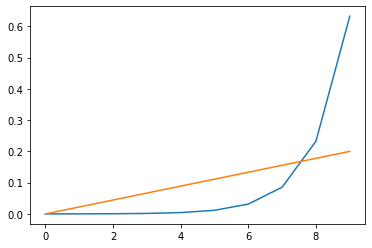

In [32]:
# 多分类，对比softmax与线性的求和表现

%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

x = np.arange(10)
e = softmax(x)
print(e)
f = x/np.sum(x)
print(f)

plt.plot(x, e, x, f)

# 总结：softmax 能够很明显体现出最大值。

## 利用神经网络进行“手写数字识别”

### MNIST数据集 导入

In [36]:
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 把图像的形状变为原来的尺寸
print(img.shape)  # (28, 28)

img_show(img)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


### 神经网络的推理处理

In [56]:
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2) # sigmoid 做激活函数
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3) # softmax 做输出函数

    return y

x, t = get_data()
print(x.shape) # 10000张图片，每张图片28*28像素
print(t.shape) # 10000张图片对应的标签

network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i]) # 每个x在0~9的概率
    p= np.argmax(y) # 获取概率最高的元素的索引，cc：刚好这里索引对应的就是数字
    if p == t[i]: # 然后和t[i]的标签进行对比；
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

(10000, 784)
(10000,)
Accuracy:0.9352


### 批处理

In [54]:
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()

batch_size = 100 # 批数量
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size] # for循环每次取100个，而不是每次取1个
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x))) # 和上面的结果一致

Accuracy:0.9352


## 额外的学习

### 1.关于绝对路径

In [68]:
import os

# 在py文件这样写，但是在notebook不行
# dataset_dir = os.path.dirname(os.path.abspath(__file__))

# 在notebook 要这样写：
base_dir1 = os.path.dirname(os.path.realpath('file'))
print(base_dir)

base_dir2 = os.path.dirname(base_dir1)
print(base_dir2)

base_dir3 = os.path.dirname(base_dir2)
print(base_dir3)

# 获取os的路径
path4 = os.__file__
print(path4)


/Users/matao/study/self_repository/deepLearning/ch03
/Users/matao/study/self_repository/deepLearning
/Users/matao/study/self_repository
/Users/matao/opt/anaconda3/lib/python3.8/os.py


### 2.frombuffer

#### 形式

numpy.frombuffer(buffer, dtype=float, count=-1, offset=0)

#### 解释：

将缓冲区解释为一维数组。

#### 参数

buffer ：buffer_like，公开缓冲区接口的对象。

dtype ：data-type, 可选。返回array的数据类型;默认值:float。

count ：int, 可选。要阅读的条目数。-1表示缓冲区中的所有数据。

offset ：int, 可选。从这个偏移量(以字节为单位)开始读取缓冲区;默认值:0。



In [72]:
s = b'hello world'
print(type(s))
np.frombuffer(s, dtype='S1', count=5, offset=6)


b = np.frombuffer(b'\x01\x02', dtype=np.uint8)
print(b)

c = np.frombuffer(b'\x01\x02\x03\x04\x05', dtype=np.uint8, count=3)
print(c)

<class 'bytes'>
[1 2]
[1 2 3]


### 3. reshape(-1)

In [74]:
c = np.array([1,2,3,4,5,6])
d = c.reshape(-1, 2) # -1 代表“待定”，根据第二个数字（2）再推算得出。
print(c)
print(d)
print(d.shape)

[1 2 3 4 5 6]
[[1 2]
 [3 4]
 [5 6]]
(3, 2)


In [79]:
# reshape(-1, n) 变成 (total/n, n)

c = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
d = c.reshape(-1, 2)
print(d)

e = c.reshape(-1, 3)
print(e)

f = c.reshape(-1, 5) # 当12个元素并不能重组成 ?×5 的结构是会报错
print(f)

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


ValueError: cannot reshape array of size 12 into shape (5)

### 4. 关于one hot实现

In [85]:
X = np.array([1,2,3,1])
print(X.size)

T = np.zeros((X.size, 10))
print(T)

for idx, row in enumerate(T):
    print(idx)
    print(row)
    row[X[idx]] = 1
    print(row)
    

4
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
2
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
